In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Basic statistics and data info
print("Dataset info:")
print(df_train.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  ch

In [7]:
# Summary statistics
print("\nSummary statistics:")
print(df_train.describe())


Summary statistics:
       respondent_id   xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000   26591.000000               26636.000000   
mean    13353.000000      1.618486       1.262532                   0.048844   
std      7709.791156      0.910311       0.618149                   0.215545   
min         0.000000      0.000000       0.000000                   0.000000   
25%      6676.500000      1.000000       1.000000                   0.000000   
50%     13353.000000      2.000000       1.000000                   0.000000   
75%     20029.500000      2.000000       2.000000                   0.000000   
max     26706.000000      3.000000       2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214   

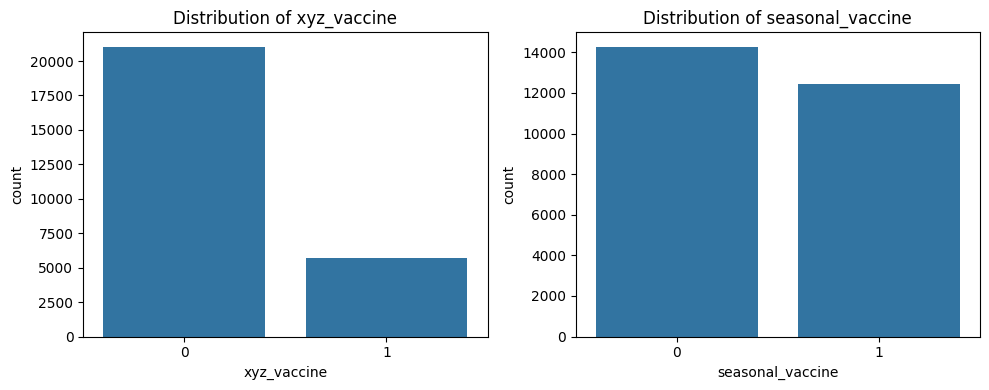

In [8]:
# Distribution of target variables
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='xyz_vaccine', data=df_train)
plt.title('Distribution of xyz_vaccine')
plt.subplot(1, 2, 2)
sns.countplot(x='seasonal_vaccine', data=df_train)
plt.title('Distribution of seasonal_vaccine')

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


train_features_path = 'C:\\Users\\SHUBHAM\\training_set_features.csv'  
train_labels_path = 'C:\\Users\\SHUBHAM\\training_set_labels.csv'      
test_features_path = 'C:\\Users\\SHUBHAM\\test_set_features.csv' 
submission_format_path = 'C:\\Users\\SHUBHAM\\test_set_features.csv'

# Replacing the paths
df_train_features = pd.read_csv(train_features_path)
df_train_labels = pd.read_csv(train_labels_path)
df_test_features = pd.read_csv(test_features_path)


# Save respondent_id before dropping it from features
respondent_ids_test = df_test_features['respondent_id'].copy()

# Drop respondent_id from features
df_train_features.drop(columns=['respondent_id'], inplace=True)
df_test_features.drop(columns=['respondent_id'], inplace=True)

# Debug: Check shapes of datasets
print("Train features shape:", df_train_features.shape)
print("Train labels shape:", df_train_labels.shape)
print("Test features shape:", df_test_features.shape)

# Fill missing values with the most frequent value (mode)
df_train_features.fillna(df_train_features.mode().iloc[0], inplace=True)
df_test_features.fillna(df_test_features.mode().iloc[0], inplace=True)

# Convert categorical variables to numerical using one-hot encoding
df_train_features = pd.get_dummies(df_train_features, drop_first=True)
df_test_features = pd.get_dummies(df_test_features, drop_first=True)

# Align the train and test dataframes by columns
df_train_features, df_test_features = df_train_features.align(df_test_features, join='left', axis=1, fill_value=0)

# Debug: Check shapes after one-hot encoding and alignment
print("Train features shape after encoding:", df_train_features.shape)
print("Test features shape after encoding:", df_test_features.shape)

# Separate features and target variables
X = df_train_features.values  # Features for training
y = df_train_labels[['xyz_vaccine', 'seasonal_vaccine']]  # Target variables for training

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Debug: Check scaled features
print("First 5 rows of scaled features (train):")
print(X_scaled[:5])

# Initialize logistic regression models
logistic_model_xyz = LogisticRegression(max_iter=1000)
logistic_model_seasonal = LogisticRegression(max_iter=1000)

# Train the models
logistic_model_xyz.fit(X_scaled, y['xyz_vaccine'])
logistic_model_seasonal.fit(X_scaled, y['seasonal_vaccine'])

# Make predictions on test set
X_test_scaled = scaler.transform(df_test_features.values)  # Scale test set features
xyz_probs_test = logistic_model_xyz.predict_proba(X_test_scaled)[:, 1]
seasonal_probs_test = logistic_model_seasonal.predict_proba(X_test_scaled)[:, 1]

# Debug: Check first 5 probabilities
print("First 5 xyz vaccine probabilities:", xyz_probs_test[:5])
print("First 5 seasonal vaccine probabilities:", seasonal_probs_test[:5])

# Ensure respondent_id is included in the submission format
submission = pd.DataFrame({
    'respondent_id': respondent_ids_test,  # Use saved respondent_ids_test
    'xyz_vaccine': xyz_probs_test,
    'seasonal_vaccine': seasonal_probs_test
})

# Save submission to CSV file
submission.to_csv('submission.csv', index=False)

# Print confirmation
print("Submission saved successfully.")


Train features shape: (26707, 35)
Train labels shape: (26707, 3)
Test features shape: (26708, 35)
Train features shape after encoding: (26707, 93)
Test features shape after encoding: (26708, 93)
First 5 rows of scaled features (train):
[[-0.68184881 -2.04427905 -0.22629268 -1.63495714 -0.27209711 -2.17794418
  -0.74589006  1.40489227  0.68786957 -0.50389348 -0.65943715 -0.61273501
  -0.29499191 -0.34894956  0.26366768 -0.85266014 -1.04761008 -0.26038272
  -1.88052783 -1.24006192 -0.07196978 -1.18346335 -0.57238698 -0.4102881
  -0.493943    1.94957095 -0.58693488  3.20969754 -0.86988089 -0.59847073
  -0.26520755 -0.25344803  0.50838785 -0.82712405 -0.58503218  2.98370311
   1.12875924 -0.53418151  1.26901527 -0.23986546 -0.34536087 -0.20980239
  -0.37320226 -0.34617526 -0.29046873 -0.43788669 -0.30279654  2.88814441
  -0.36250908 -0.64602114  1.64630987 -0.18952025 -0.11099101 -0.08708151
   0.83098162 -0.07464917 -0.21981808 -0.10200027 -0.15339888 -0.06829814
  -0.10404193 -0.05782389

PermissionError: [Errno 13] Permission denied: 'submission.csv'

In [ ]:
#THE FILE HAS BEEN ALREADY SAVED WHILE RUNNING CODE IN VS CODE THEREFORE PERMISSION TO AGAIN SAVE THE FILE IS DENIED.

In [17]:
# Calculate ROC AUC scores
from sklearn.metrics import roc_auc_score
 #Calculate ROC AUC score for xyz_vaccine
roc_auc_xyz = roc_auc_score(y_true=df_train_labels['xyz_vaccine'], y_score=logistic_model_xyz.predict_proba(X_scaled)[:, 1])

# Calculate ROC AUC score for seasonal_vaccine
roc_auc_seasonal = roc_auc_score(y_true=df_train_labels['seasonal_vaccine'], y_score=logistic_model_seasonal.predict_proba(X_scaled)[:, 1])

# Calculate average ROC AUC
avg_roc_auc = (roc_auc_xyz + roc_auc_seasonal) / 2

print(f"ROC AUC for xyz_vaccine: {roc_auc_xyz:.4f}")
print(f"ROC AUC for seasonal_vaccine: {roc_auc_seasonal:.4f}")
print(f"Average ROC AUC: {avg_roc_auc:.4f}")


ROC AUC for xyz_vaccine: 0.8380
ROC AUC for seasonal_vaccine: 0.8560
Average ROC AUC: 0.8470
